# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
df = pd.read_pickle(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Data\Prepared Data\task 4.10 continued.pkl')

In [3]:
#check data
df.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,...,loyalty_flag,average_prices,spending_flag,median_days_since_prior_order,frequency_flag,region,age_group,income_class,department,parental_status
0,1,Female,Alabama,31,2/17/2019,3,married,40423,2539329,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,30s,Low income,Beverages,Kids at Home
1,1,Female,Alabama,31,2/17/2019,3,married,40423,2539329,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,30s,Low income,Dairy Eggs,Kids at Home
2,1,Female,Alabama,31,2/17/2019,3,married,40423,2539329,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,30s,Low income,Snacks,Kids at Home
3,1,Female,Alabama,31,2/17/2019,3,married,40423,2539329,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,30s,Low income,Snacks,Kids at Home
4,1,Female,Alabama,31,2/17/2019,3,married,40423,2539329,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,30s,Low income,Household,Kids at Home


In [4]:
#check shape
df.shape

(30993489, 37)

# 03. Visualizations

In [5]:
#names of columns
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'has_prior_orders', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_prices', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'region', 'age_group', 'income_class', 'department',
       'parental_status'],
      dtype='object')

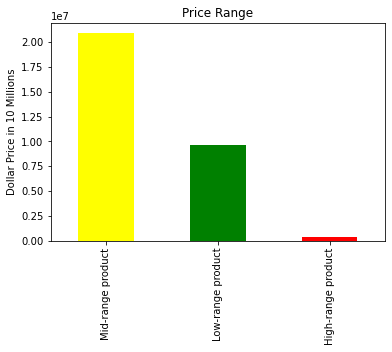

In [7]:
#create bar chart for price range loc
df['price_range_loc'].value_counts().plot.bar(color = ['yellow', 'green', 'red'])
plt.title('Price Range')
plt.ylabel('Dollar Price in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\price range bar.png', bbox_inches = 'tight')

Text(0.5, 1.0, 'Price Range')

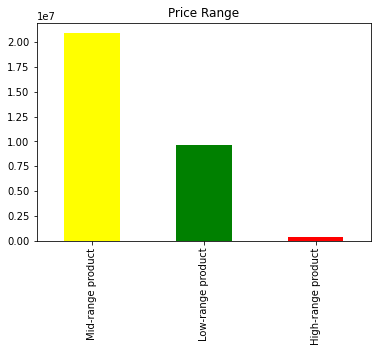

In [7]:
#save bar chart
bar= df['price_range_loc'].value_counts().plot.bar(color = ['yellow', 'green', 'red'])
plt.title('Price Range')

In [39]:
#export bar chart
bar.figure.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\price range bar.png', bbox_inches = 'tight')

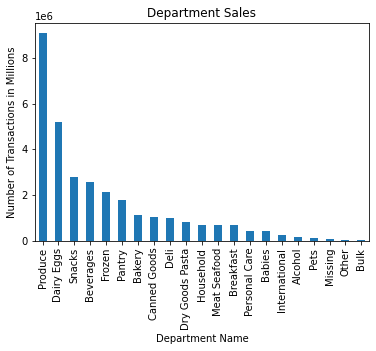

In [8]:
#create department bar chart
bar_2 = df['department'].value_counts().plot.bar()
plt.title('Department Sales')
plt.ylabel('Number of Transactions in Millions')
plt.xlabel('Department Name')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\department bar.png', bbox_inches = 'tight')

In [37]:
#export bar chart
bar_2.figure.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\department bar.png', bbox_inches = 'tight')

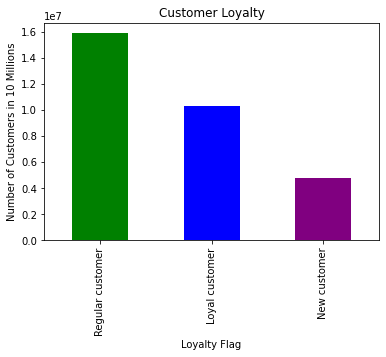

In [9]:
bar_3 = df['loyalty_flag'].value_counts().plot.bar(color = ['green', 'blue', 'purple'])
plt.title('Customer Loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\loyalty bar.png', bbox_inches = 'tight')

In [38]:
#export bar chart
bar_3.figure.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\loyalty bar.png', bbox_inches = 'tight')

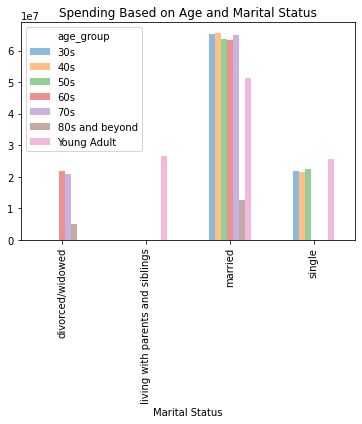

In [13]:
#create pivot table for bar chart
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'marital_status', columns = 'age_group', aggfunc=np.sum)
#create grouped bar chart
ax = df_pivot.plot(kind= 'bar', alpha=0.5)
#add labels
plt.title('Spending Based on Age and Marital Status')
plt.xlabel('Marital Status')
#show the plot
plt.show()

<Figure size 648x432 with 0 Axes>

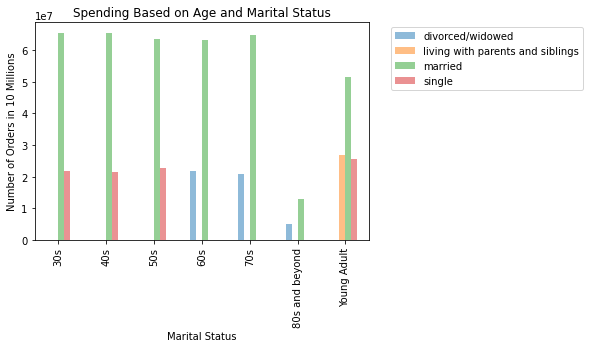

In [23]:
#save plot
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'age_group', columns = 'marital_status', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Spending Based on Age and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\age and marital status bar.png', bbox_inches = 'tight')
plt.show()

In [15]:
(df['region'] == 'Northeast').sum()

5470164

In [16]:
(df['region'] == 'Midwest').sum()

7267902

In [17]:
(df['region'] == 'South').sum()

10320831

In [18]:
(df['region'] == 'West').sum()

7934592

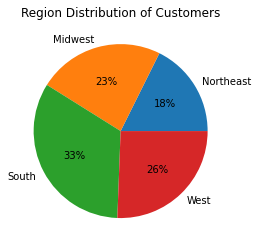

In [17]:
#create pie chart
x = [5470164, 7267902, 10320831, 7934592]
labels = ['Northeast', 'Midwest', 'South', 'West']
plt.pie(x, labels = labels, autopct='%1.0f%%')
plt.title('Region Distribution of Customers')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\regions pie.png')
plt.show()

In [20]:
#count of single
(df['marital_status'] == 'single').sum()

5099384

In [21]:
#count of married
(df['marital_status'] == 'married').sum()

21763585

In [22]:
#count of divorced/widowed
(df['marital_status'] == 'divorced/widowed').sum()

2647799

In [23]:
#count of living with parents and siblings
(df['marital_status'] == 'living with parents and siblings').sum()

1482721

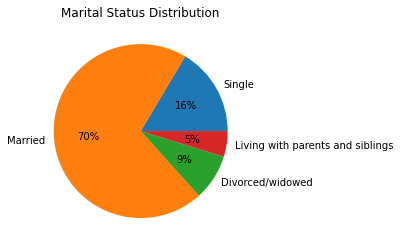

In [18]:
#create pie chart
x = [5099384, 21763585, 2647799, 1482721]
labels = ['Single', 'Married', 'Divorced/widowed', 'Living with parents and siblings']
plt.pie(x, labels = labels, autopct='%1.0f%%')
plt.title('Marital Status Distribution')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\marital status pie.png')
plt.show()

In [25]:
#counts of income classes
df['income_class'].value_counts()

Middle income          13407449
Upper-middle income    10321006
Upper income            3898815
Low income              3366219
Name: income_class, dtype: int64

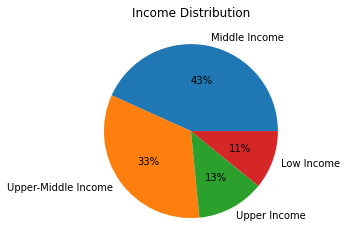

In [19]:
#create pie chart
x = [13407449, 10321006, 3898815, 3366219]
labels = ['Middle Income', 'Upper-Middle Income', 'Upper Income', 'Low Income']
plt.pie(x, labels = labels, autopct='%1.0f%%')
plt.title('Income Distribution')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\income pie.png')
plt.show()

In [27]:
df['age_group'].value_counts()

Young Adult       5823190
40s               4887799
30s               4851781
50s               4846544
70s               4838379
60s               4766300
80s and beyond     979496
Name: age_group, dtype: int64

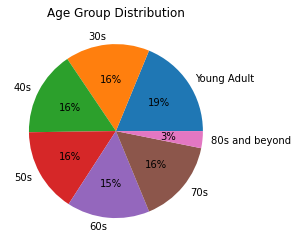

In [20]:
#create pie chart
x = [5823190, 4851781, 4887799, 4846544, 4766300, 4838379, 979496]
labels = ['Young Adult', '30s', '40s', '50s', '60s', '70s', '80s and beyond']
plt.pie(x, labels = labels, autopct='%1.0f%%')
plt.title('Age Group Distribution')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\age group pie.png')
plt.show()

<Figure size 648x432 with 0 Axes>

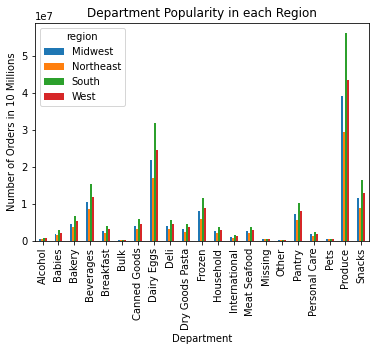

In [24]:
#save plot
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'department', columns = 'region', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=1)
plt.title('Department Popularity in each Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\regional department bar.png', bbox_inches = 'tight')
plt.show()

<Figure size 648x432 with 0 Axes>

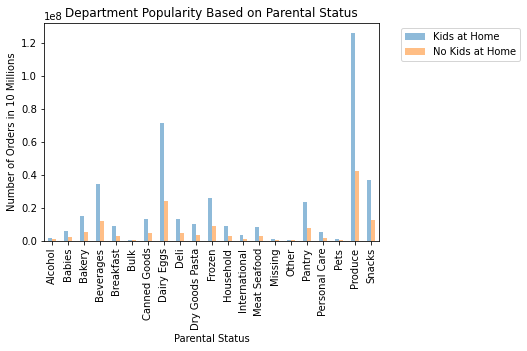

In [21]:
#save plot
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'department', columns = 'parental_status', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Department Popularity Based on Parental Status')
plt.xlabel('Parental Status')
plt.ylabel('Number of Orders in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\department and parental status bar.png', bbox_inches = 'tight')
plt.show()

<Figure size 648x432 with 0 Axes>

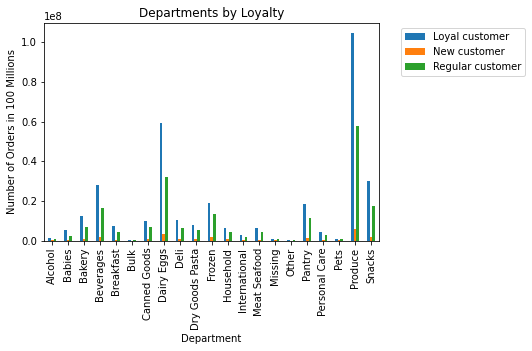

In [10]:
#create customer loyalty chart
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'department', columns = 'loyalty_flag', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Departments by Loyalty')
plt.xlabel('Department')
plt.ylabel('Number of Orders in 100 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\department by loyalty.png', bbox_inches = 'tight')
plt.show()

<Figure size 648x432 with 0 Axes>

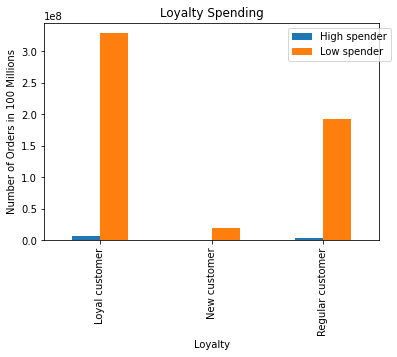

In [11]:
#create customer loyalty chart
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'loyalty_flag', columns = 'spending_flag', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Loyalty Spending')
plt.xlabel('Loyalty')
plt.ylabel('Number of Orders in 100 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\loyalty spending.png', bbox_inches = 'tight')
plt.show()

<Figure size 648x432 with 0 Axes>

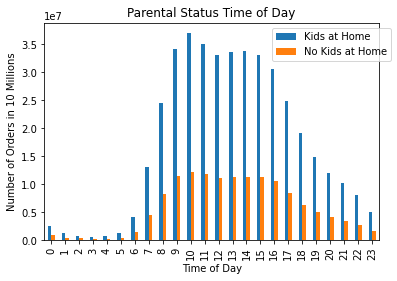

In [12]:
#create parental status time of day chart
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'order_hour_of_day', columns = 'parental_status', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Parental Status Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\parental status time of day.png', bbox_inches = 'tight')
plt.show()

<Figure size 648x432 with 0 Axes>

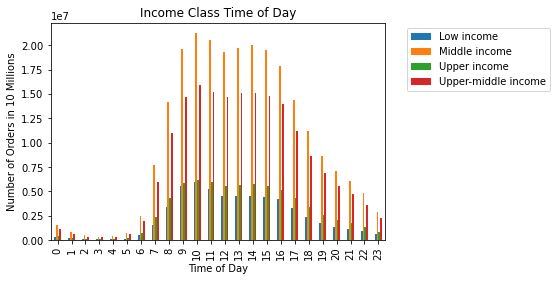

In [13]:
#create Income class time of day chart
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'order_hour_of_day', columns = 'income_class', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Income Class Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\Income Class Time of Day.png', bbox_inches = 'tight')
plt.show()

<Figure size 648x432 with 0 Axes>

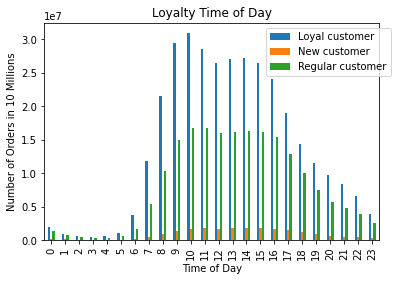

In [14]:
#create loyalty time of day chart
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'order_hour_of_day', columns = 'loyalty_flag', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Loyalty Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders in 10 Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\loyalty Time of Day.png', bbox_inches = 'tight')
plt.show()

<Figure size 648x432 with 0 Axes>

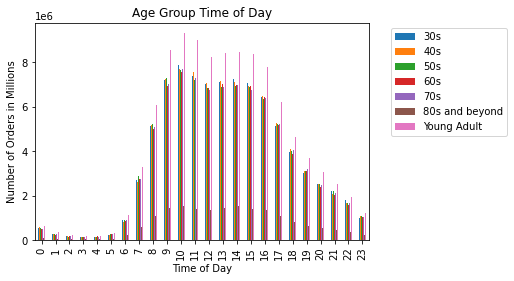

In [25]:
#create age group time of day chart
plt.figure(figsize=(9,6))
df_pivot = pd.pivot_table(df, values= 'order_number', index = 'order_hour_of_day', columns = 'age_group', aggfunc=np.sum)
ax = df_pivot.plot(kind= 'bar', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Age Group Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders in Millions')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\age group Time of Day.png', bbox_inches = 'tight')
plt.show()